In [1]:
import pandas as pd
import numpy as np
from src import soporte_limpieza as sl
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth', None) # No cortar el contenido de las celdas
pd.options.display.float_format = '{:.2f}'.format

>Carga del archivo y análisis visual de las columnas: Esto nos dará un mayo entendimiento del contexto de las columnas  

In [2]:
df = pd.read_pickle("../11.Proyecto2_EDA-Ingresos-Publicos-Brasil/datos/datos-unidos.pkl")
df.sample()

,NOMBRE ÓRGANO SUPERIOR,CÓDIGO ÓRGANO,NOMBRE ÓRGANO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,TIPO INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA LANZAMIENTO,AÑO EJERCICIO
103140,Ministério da Educação,26264,Universidade Federal Rural do Semi-Árido,153033,UNIVERSIDADE FEDERAL RURAL DO SEMI-ARIDO - RN,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERVICOS DE INFORMACAO E TECNOLOGIA-PRINCIPAL,0.00,0.00,710.00,0.00,2018-03-28,2018


> Ver el tamaño de una estructura de datos. Esto es de gran utilidad para verificar cuántos datos se cargaron desde un archivo.

In [3]:
df.shape

(1026299, 15)

> Utilizamos el atributo df.columns en pandas para conocer el nombre de todas las columnas de una manera rápida

In [4]:
df.columns

Index(['NOMBRE ÓRGANO SUPERIOR', 'CÓDIGO ÓRGANO', 'NOMBRE ÓRGANO',
       'CÓDIGO UNIDAD GESTORA', 'NOMBRE UNIDAD GESTORA', 'CATEGORÍA ECONÓMICA',
       'ORIGEN INGRESO', 'TIPO INGRESO', 'DETALLE',
       'VALOR PREVISTO ACTUALIZADO', 'VALOR LANZADO', 'VALOR REALIZADO',
       'PORCENTAJE REALIZADO', 'FECHA LANZAMIENTO', 'AÑO EJERCICIO'],
      dtype='object')

> Obtenemos toda la información del DataFrame para analizarlo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026299 entries, 0 to 134592
Data columns (total 15 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   NOMBRE ÓRGANO SUPERIOR      1026299 non-null  object        
 1   CÓDIGO ÓRGANO               1026299 non-null  int64         
 2   NOMBRE ÓRGANO               1026299 non-null  object        
 3   CÓDIGO UNIDAD GESTORA       1026299 non-null  int64         
 4   NOMBRE UNIDAD GESTORA       1026299 non-null  object        
 5   CATEGORÍA ECONÓMICA         1026299 non-null  object        
 6   ORIGEN INGRESO              1026299 non-null  object        
 7   TIPO INGRESO                1026299 non-null  object        
 8   DETALLE                     1026299 non-null  object        
 9   VALOR PREVISTO ACTUALIZADO  1026299 non-null  float64       
 10  VALOR LANZADO               1026299 non-null  float64       
 11  VALOR REALIZADO             10

**Insights:** 

- El DataFrame contiene 1026299 registros y 15 columnas con información sobre la ejecución de ingresos públicos en Brasil durante los años 2013 al 2021.

- Todas las columnas tienen datos completos después de trabajar sobre los datos nulos que nos dio la columna "FECHA DE LANZAMIENTO".

- Los tipos de datos incluyen 2 columnas numéricas enteras (int64), 7 categóricas (object), 4 numérica flotante (float64) y 2 de fecha (datetime64[ns] e int32). 

- El DataFrame ocupa aproximadamente 121.4 MB en memoria.

> Analisis descriptivo: Análisis estadístico básico, organizado en filas para facilitar la lectura, comparación y diagnóstico inicial de las columnas de un DataFrame.

In [6]:
df_descriptivos_numericos = df.describe().T
df_descriptivos_numericos

,count,mean,min,25%,50%,75%,max,std
CÓDIGO ÓRGANO,1026299.00,31435.16,20101.00,25201.00,26298.00,36000.00,91214.00,10382.65
CÓDIGO UNIDAD GESTORA,1026299.00,231293.74,110005.00,154003.00,170013.00,250088.00,913001.00,144178.42
VALOR PREVISTO ACTUALIZADO,1026299.00,27611421.05,-214773743.00,0.00,0.00,0.00,1603521711208.00,3393367175.13
VALOR LANZADO,1026299.00,5242806.11,-148347267246.91,0.00,0.00,0.00,357160677863.97,810883695.36
VALOR REALIZADO,1026299.00,24980422.31,-156285934188.03,260.90,3022.32,40853.85,771117711060.95,1406892548.84
PORCENTAJE REALIZADO,1026299.00,80.31,-114552.00,0.00,0.00,0.00,72363772.00,71481.11
FECHA LANZAMIENTO,1026299,2018-09-20 14:26:49.968756480,2013-12-31 00:00:00,2017-03-31 00:00:00,2018-08-27 00:00:00,2020-02-12 00:00:00,2021-12-03 00:00:00,NaN
AÑO EJERCICIO,1026299.00,2018.23,2013.00,2017.00,2018.00,2020.00,2021.00,1.74


**Insights:** 


1.	CÓDIGO ÓRGANO: Código numérico que identifica la entidad gubernamental superior.

    - Al tratarse de una columna con códigos que identifican la entidad gubernamental superior, no podemos sacar conclusiones relevantes del análisis descriptivo.

2.	CÓDIGO UNIDAD GESTORA: Código numérico de la unidad gestora responsable.

	- De igual manera que en el caso anterior, no podemos no podemos sacar conclusiones relevantes del análisis descriptivo.

3.	VALOR PREVISTO ACTUALIZADO: Monto actualizado del ingreso previsto (formato texto).

	- Podemos observar que los percentiles son 0, lo que quiere decir que la mayoría de los datos son 0. Lo cual quiere decir que el valor previsto actualizado en la mayoría de los casos es 0.
	- El valor mínimo es negativo y con una cantidad bastante grande (-214.773.743), algo que parece extraño al ser un "valor previsto actualizado"
	- El valor máximo (1.603.521.711.208) es muy alto si lo comparamos con la media (27.611.321). Además, si lo comparamos con la desviación estándar (3.393.367.175), vemos que hay una gran dispersión en los datos. Es decir, hay datos muy altos y muy bajos, por lo que el valor máximo es algo puntual.

4.	VALOR LANZADO: Monto que fue registrado como lanzado

	- Vemos que nos sucede algo similar al anterior caso. Los percentiles son 0, lo cuál quiere decir que la mayoría de los datos son 0.
	- El valor mínimo (-148.347.267.246) es negativo, lo cuál es extraño al ser un valor lanzado. 
	- Si comparamos la media (5.242.806) con el valor máximo (357.160.677.863) hay mucha diferencia y, viendo la desviación estándar (810.883.695) podemos confirmar que hay uan gran desviación de los datos. Por lo que hay mucha diferencia entre unos valores y otros.

5.	VALOR REALIZADO: Monto realmente recaudado

	- El 25% de los datos están por encima de 260,905, el 50% (3.022,32) refleja que la mitad de los registros tienen ese valor o menos y el 75% indica que el 75% de los registros tiene valores por dejabjo de 408.53,855. Por lo que podemos afirmar que en la mayoría de los casos los registros tienden a tener valores pequeños.
	- El valor mínimo es de -156.285.934.188,029999, algo bastante extraño al tratarse de de cantidades recaudadas.
	- El valor máximo es demasiado alto en comparación con el promedio y la desviación estándar nos dice que hay mucha dispersión de los datos.

6.	PORCENTAJE REALIZADO: Porcentaje de ejecución respecto al valor previsto.

	- El principal dato a destacar es que hay datos en negativo, lo cual quiere decir que la ejecución del valor está por debajo del valor previsto.
	- El valor promedio de 80,3% quiere decir que en la mayoría de los casos el porcentaje de ejecución es bastante alto.
	- Gracias a los percentiles podemos ver que la mayoría de datos son 0.
	- La desviación estándar nos dice que hay mucha dispersión de datos, lo cuál quiere decir que hay porcentajes muy altos y muy bajos.

7.	FECHA LANZAMIENTO: Fecha en la que se registró la ejecución del ingreso.

	- El valor mínimo (2013-12-31) lo cuál quiere decir que la primera fecha de la base de datos es del 31 de diciembre de 2013 y la última del 3 de diciembre de 2021.

8.	AÑO EJERCICIO: Año correspondiente a la ejecución de los ingresos.

	- 

Conclusión:


Los datos muestran una alta variabilidad, con valores tanto negativos como cercanos a cero, lo cuál es llamativo al tratarse de ingresos, es decir, los ingresos registrados tienen una gran dispersión en relación al valor previsto y lanzado. Por lo que hay que realizar un análisis de los datos para saber qué está pasando.
La ejecución promedio respecto al valor previsto es alta (80%), aunque muchos registros tienen un porcentaje de ejecución de 0%, lo que refleja que una parte significativa de los ingresos aún no se ha realizado o ejecutado.

In [7]:
df_descriptivos_object = df.describe(include = "O").T
df_descriptivos_object

,count,unique,top,freq
NOMBRE ÓRGANO SUPERIOR,1026299,25,Ministério da Educação,361891
NOMBRE ÓRGANO,1026299,287,Ministério da Economia - Unidades com vínculo direto,119811
NOMBRE UNIDAD GESTORA,1026299,356,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,108481
CATEGORÍA ECONÓMICA,1026299,5,Receitas Correntes,979596
ORIGEN INGRESO,1026299,15,Outras Receitas Correntes,322907
TIPO INGRESO,1026299,63,Serviços Administrativos e Comerciais Gerais,278157
DETALLE,1026299,1886,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039


**Insights:** 
Análisis conciso de los datos:

1. NOMBRE ÓRGANO SUPERIOR: Nombre de la entidad gubernamental superior.

	- De todos los registros, hay 25 órganos superiores diferentes, siendo el Ministerio de Eucación el más frecuente.

2.	NOMBRE ÓRGANO: Nombre de la entidad gubernamental específica.

	- El ministerio de Economía es el órgano más frecuente de los 287 que hay en la base de datos.

3.	NOMBRE UNIDAD GESTORA: Nombre de la unidad gestora.

	- La unidad gestora Setorial Orcamentaria y financiera es la más freciente dentro de los 356 registros únicos que hay.

4.	CATEGORÍA ECONÓMICA: Clasificación económica de los ingresos (por ejemplo, "Receitas Correntes").

	- Hay 5 categorías económicas y Recetas Corrientes es la más frecuente.

5.	ORIGEN INGRESO: Fuente específica del ingreso (por ejemplo, "Outras Receitas Correntes").
	
	- Hay 15 tipos de fuentes específicas de los ingresos y ''Otras recetas corrientes'' es la más frecuente.

6.	TIPO INGRESO: Tipo de ingreso dentro de la fuente (por ejemplo, "Demais receitas correntes").
	
	- El tipo de ingreso tiene 63 diferentes en toda la base de datos y los Serviços Administrativos e Comerciais Gerais son los más frecuentes.

7.	DETALLE: Detalle adicional del tipo de ingreso (por ejemplo, "Receita de honorários de advogados").

	- Es la variable categórica con más valore súnicos y SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC. es el detalle más repetido.

Conclusión:

Estos datos reflejan las características cualitiativas de los ingresos públicos de Brasil. Destacando las receitas correntes como la categoría económica más recurrente y otras recetas correntes como el principal origen de los ingresos.

> Analisis de los valores unicos de las variables categoricas 

In [8]:
sl.analisis_categoria(df,"NOMBRE ÓRGANO SUPERIOR")

,NOMBRE ÓRGANO SUPERIOR,count,porcentaje
0,Ministério da Educação,361891,35.26
1,Ministério da Economia,207574,20.23
2,Ministério da Defesa,95490,9.30
3,"Ministério da Agricultura, Pecuária e Abastec",46183,4.50
4,Ministério da Justiça e Segurança Pública,39980,3.90
5,Ministério da Infraestrutura,37476,3.65
6,Ministério da Saúde,33380,3.25
7,Ministério de Minas e Energia,33014,3.22
8,"Ministério da Ciência, Tecnologia, Inovações",32846,3.20
9,Ministério do Desenvolvimento Regional,32725,3.19


**Insights:** 

Los órganos que mayor protagonismo tienen son los de Educación y Economía con un 35,26% y un 20,23% respectivamente. El tercer órgano con más protagonismo es el Ministerio de Defensa con un 9,30%.

In [9]:
sl.analisis_categoria(df,"NOMBRE ÓRGANO")

,NOMBRE ÓRGANO,count,porcentaje
0,Ministério da Economia - Unidades com vínculo direto,119811,11.67
1,Fundo do Exército,25559,2.49
2,Comando da Marinha - Fundo Naval,23734,2.31
3,Fundo Nacional de Cultura,15955,1.55
4,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,13745,1.34
...,...,...,...
282,Agência de Desenvolvimento da Amazônia,2,0.00
283,Hospital Cristo Redentor S.A.,2,0.00
284,Departamento Nacional de Estradas de Rodagem,1,0.00
285,Hospital Fêmina S.A.,1,0.00


**Insights:** 

Vemos que hay una gran diferencia entre el primero (11,67%) y el segundo (2,49%). El órgano con más protagonismo es el Ministério da Economia - Unidades com vínculo direto. El resto de órganos tienen máyor o menor protagonismo pero mucho más ajustado que este.

In [10]:
sl.analisis_categoria(df,"NOMBRE UNIDAD GESTORA")

,NOMBRE UNIDAD GESTORA,count,porcentaje
0,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,108481,10.57
1,FUNDO DO EXERCITO,25469,2.48
2,DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM,23532,2.29
3,IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ,13698,1.33
4,EMBRAPA-SETORIAL,13641,1.33
...,...,...,...
351,HOSPITAL CRISTO REDENTOR S/A,2,0.00
352,HOSPITAL FEMINA S/A,1,0.00
353,COMPANHIA DE DESENVOLVIMENTO DE BARCARENA,1,0.00
354,COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF,1,0.00


**Insights**

Vemos que sucede parecido al anterior caso. Sería interesante hacer un análisis comparativo entre los dos organismos para ver su correlación. En este caso el SETORIAL ORCAMENTARIA E FINANCEIRA / ME tiene un 10,57% de protagonismo frente a los demás que parten de un 2,48%.

Vemos que son datos muy similares a los anteriores, lo cuál puede decir que hay mucha correlación entre ambas columnas

In [11]:
sl.analisis_categoria(df,"CATEGORÍA ECONÓMICA")

,CATEGORÍA ECONÓMICA,count,porcentaje
0,Receitas Correntes,979596,95.45
1,Receitas de Capital,30116,2.93
2,Receitas Correntes - intra-orçamentárias,16235,1.58
3,Sem informação,257,0.03
4,Receitas de Capital - intra-orçamentárias,95,0.01


**Insights**

Las recetas correntes son las que más predominan con un 95% frente al resto de categorías. 

In [12]:
sl.analisis_categoria(df,"ORIGEN INGRESO")

,ORIGEN INGRESO,count,porcentaje
0,Outras Receitas Correntes,322907,31.46
1,Receita de Serviços,322319,31.41
2,Receita Patrimonial,163171,15.90
3,"Impostos, Taxas e Contribuições de Melhoria",78340,7.63
4,Contribuições,66781,6.51
5,Receita Industrial,18857,1.84
6,Receita Agropecuária,13642,1.33
7,Alienação de Bens,12418,1.21
8,Amortizações de Empréstimos,11318,1.10
9,Transferências Correntes,6385,0.62


**Insights**

Vemos que el origen de los ingresos está repartido muy equitativamente entre Outras Receitas Correntes y Receita de Serviços que tienen un porcentaje casi similar, 31,46% y 31,41% respectivamente. 

In [13]:
sl.analisis_categoria(df,"TIPO INGRESO")

,TIPO INGRESO,count,porcentaje
0,Serviços Administrativos e Comerciais Gerais,278157,27.10
1,"Indenizações, restituições e ressarcimentos",143577,13.99
2,"Multas administrativas, contratuais e judicia",115276,11.23
3,Exploração do patrimônio imobiliário do Estad,88862,8.66
4,Taxas,62336,6.07
...,...,...,...
58,Receita dívida ativa alienação de estoques de,3,0.00
59,Receitas decorrentes de compensações ao Regim,2,0.00
60,Demais receitas de capital,2,0.00
61,Receita da dívida ativa,1,0.00


**Insights**

los tipos de ingresos más predominantes son: Serviços Administrativos e Comerciais Gerais (27,10%), Indenizações, restituições e ressarcimentos (13,99%) y Multas administrativas, contratuais e judicia (11,23%)

In [14]:
sl.analisis_categoria(df,"DETALLE")

,DETALLE,count,porcentaje
0,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039,15.50
1,INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL,74638,7.27
2,ALUGUEIS E ARRENDAMENTOS-PRINCIPAL,71040,6.92
3,MULTAS PREVISTAS EM LEGISL.ESPECIFICA-PRINC.,44580,4.34
4,RESTIT.DE DESPESAS DE EXERC.ANTERIORES-PRINC.,31513,3.07
...,...,...,...
1881,CONTRIBUIÇÃO PARA O PIS/PASEP-JUROS-DÍV.ATIVA,1,0.00
1882,RESTITUICAO DE RECURSOS DE FOMENTO-DIV. ATIVA,1,0.00
1883,ROYALTIES MINIMOS PELA PRODOCAO EM TERRA,1,0.00
1884,RECEITA INDUSTRIAL-MULTAS E JUROS-INTRA,1,0.00


**Insights**

El detalle predominante es SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC. con un 15,50% frente al segundo que es INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL con un 7,27%

> Distribución de ingresos por categoría económica

In [15]:
df.head(1)

,NOMBRE ÓRGANO SUPERIOR,CÓDIGO ÓRGANO,NOMBRE ÓRGANO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,TIPO INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA LANZAMIENTO,AÑO EJERCICIO
0,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com vínculo direto,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.00,0.00,1297.13,0.00,2013-12-31,2013


- Análisis de las categorías de ingresos más significativas y su participación en los ingresos totales.

Comparación entre Ingresos Previstos y Realizados por Categoría Económica

In [16]:
categorias_ingresos = df.groupby("CATEGORÍA ECONÓMICA")[["VALOR PREVISTO ACTUALIZADO","VALOR LANZADO","VALOR REALIZADO"]].sum()
categorias_ingresos["DIFERENCIA"] = categorias_ingresos["VALOR REALIZADO"] - categorias_ingresos["VALOR PREVISTO ACTUALIZADO"]
categorias_ingresos = categorias_ingresos.reset_index()
categorias_ingresos.sort_values(by="DIFERENCIA", ascending=False)

,CATEGORÍA ECONÓMICA,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,DIFERENCIA
3,Receitas de Capital - intra-orçamentárias,10808411537.00,0.00,28250835724.33,17442424187.33
1,Receitas Correntes - intra-orçamentárias,291485025919.00,0.00,292651790699.89,1166764780.89
4,Sem informação,0.00,2812347576.39,46.57,46.57
0,Receitas Correntes,13549526943206.14,5377870503243.72,12909343128909.43,-640183814296.71
2,Receitas de Capital,14485753431206.59,3813949.42,12407136680065.79,-2078616751140.80


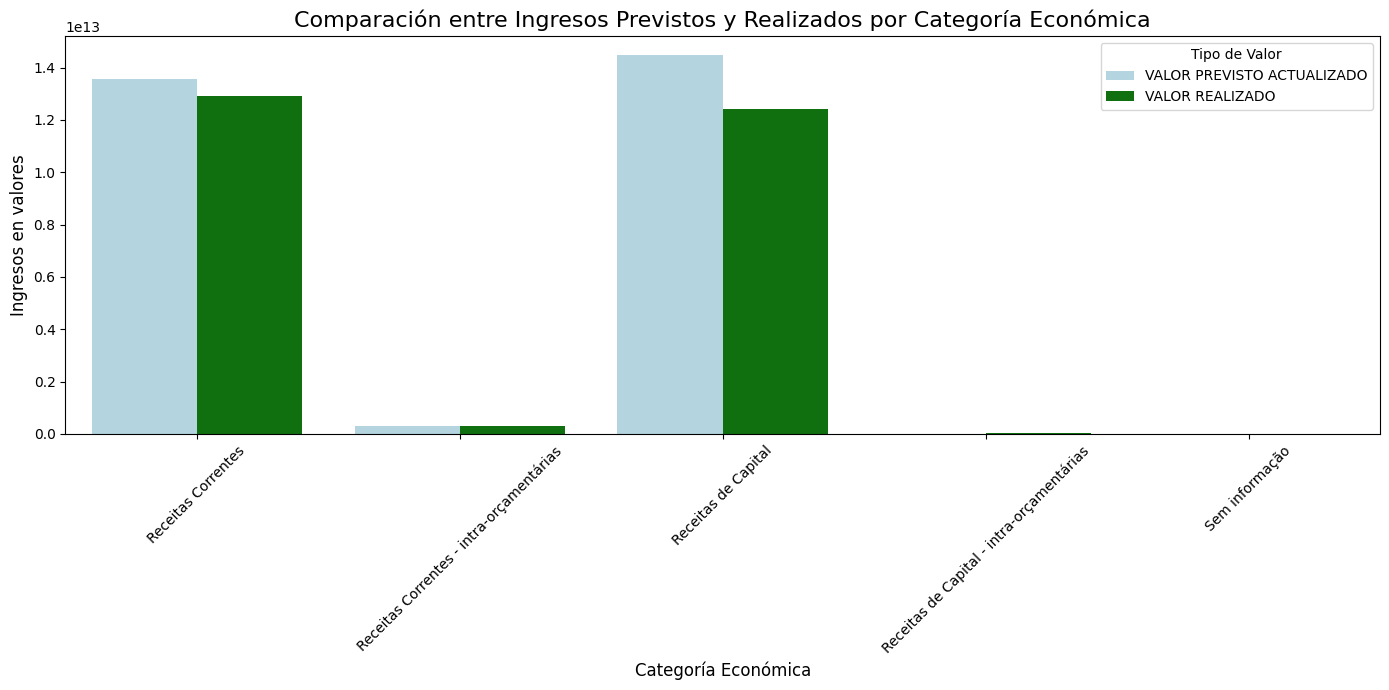

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorias_ingresos_melted = categorias_ingresos.melt(
    id_vars='CATEGORÍA ECONÓMICA', 
    value_vars=['VALOR PREVISTO ACTUALIZADO', 'VALOR REALIZADO'], 
    var_name='Tipo de Valor', 
    value_name='Valor'
)

plt.figure(figsize=(14, 7))

sns.barplot(
    x='CATEGORÍA ECONÓMICA', 
    y='Valor', 
    hue='Tipo de Valor', 
    data=categorias_ingresos_melted, 
    palette={'VALOR PREVISTO ACTUALIZADO': 'lightblue', 'VALOR REALIZADO': 'green'}
)

plt.title('Comparación entre Ingresos Previstos y Realizados por Categoría Económica', fontsize=16)
plt.xlabel('Categoría Económica', fontsize=12)
plt.ylabel('Ingresos en valores', fontsize=12)
plt.xticks(rotation=45)  


plt.legend(title='Tipo de Valor')


plt.tight_layout()
plt.show()

En primer lugar, destacar que la columna "Diferencia" la hemos calculado restando el valor realizado - el valor previsto para obtener en negativo los datos de ''pérdidas'' o de ingresos que no se han alcanzado en funión de lo previsto. Es decir, que lo que aparezca en negativo, sea lo que realmente está por debajo del objetivo previsto.

A partir de aquí, podemos ver que hay dos categorías en negativo: Receitas Correntes y Receitas de Capital. Esto quiere decir que no se ha alcanzado el total de ingresos previstos por el gobierno y puede ser debido a numerosos casos: Alguna catástrofe que haya afectado al país, un error a la hora de calcular los ingresos anuales, etc.

Para verlo de una manera más visual, si nos fijamos en la gráfica, podemosver la comparación entre el valor previsto y el valor realizado, y vemos como tanto en las receitas Correntes como enl as Receitas de capital, es superior al realizado. Siendo insignificante en el resto de categorías.

Para ello, seguiremos analizando, tanto por el origen de los ingresos como con datos temporales, para poder saber cómo se distribuyen estos ingresos de manera temporal y saber qué se consigue cada año o cada mes.

Comparación entre Valores Previstos y Realizados por Origen de Ingreso

In [18]:
origen_ingresos = df.groupby("ORIGEN INGRESO")[["VALOR PREVISTO ACTUALIZADO","VALOR LANZADO","VALOR REALIZADO"]].sum()
origen_ingresos = origen_ingresos.reset_index()

origen_ingresos["DIFERENCIA"] = origen_ingresos["VALOR REALIZADO"] - origen_ingresos["VALOR PREVISTO ACTUALIZADO"]
origen_ingresos.sort_values(by="DIFERENCIA", ascending=False)

,ORIGEN INGRESO,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,DIFERENCIA
6,Outras Receitas de Capital,1169948076486.00,0.00,1722900919485.78,552952842999.78
1,Amortizações de Empréstimos,468392937016.00,0.00,799034542267.89,330641605251.89
9,Receita Patrimonial,922348554822.03,380086767.00,957334879441.78,34986324619.75
12,Sem informação,0.00,2812347576.39,46.57,46.57
7,Receita Agropecuária,230056327.00,0.00,212916430.85,-17139896.15
14,Transferências de Capital,1089634563.40,0.00,478697459.15,-610937104.25
8,Receita Industrial,20116477675.00,0.00,19256167707.50,-860309967.50
13,Transferências Correntes,4761797513.00,0.00,3780118794.99,-981678718.01
11,Receitas Correntes - a classificar,0.00,5042321.57,-15471989712.32,-15471989712.32
10,Receita de Serviços,440758536057.11,0.00,410410034253.08,-30348501804.03


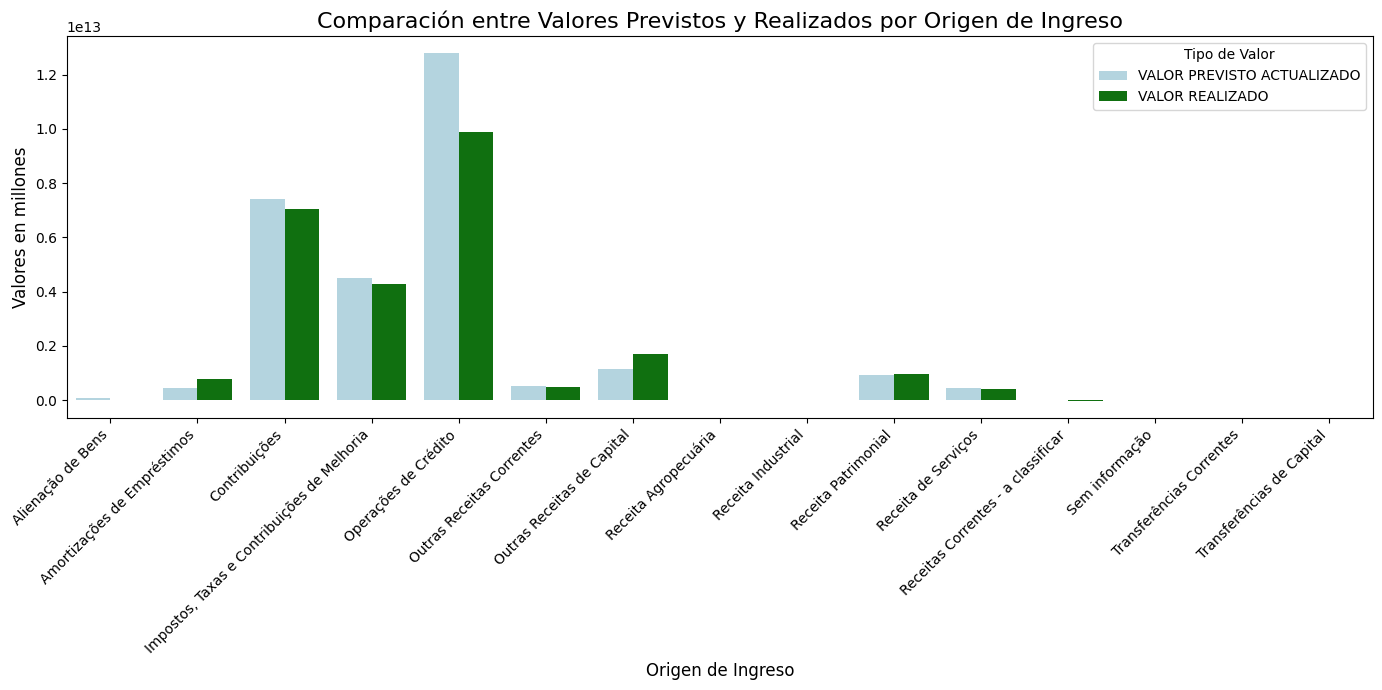

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))

origen_ingresos_melted = origen_ingresos.melt(
    id_vars='ORIGEN INGRESO', 
    value_vars=['VALOR PREVISTO ACTUALIZADO', 'VALOR REALIZADO'], 
    var_name='Tipo de Valor', 
    value_name='Valor'
)

sns.barplot(
    x='ORIGEN INGRESO', 
    y='Valor', 
    hue='Tipo de Valor', 
    data=origen_ingresos_melted, 
    palette={'VALOR PREVISTO ACTUALIZADO': 'lightblue', 'VALOR REALIZADO': 'green'}
)

plt.title('Comparación entre Valores Previstos y Realizados por Origen de Ingreso', fontsize=16)
plt.xlabel('Origen de Ingreso', fontsize=12)
plt.ylabel('Valores en millones', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad

plt.tight_layout()
plt.show()


Como podemos observar en base al origen de los ingresos, vemos que hay muy pocos puntos donde el total de ingresos previstos se alcanza. Lo cuál nos hace recurrir a los datos temporales para poder interpretar qué está pasando, ya que en prácticamente ningún caso se consiguen los ingresos previstos. 

Haciendo alusión al gráfico creado, podemos ver como, exceptuando el origen de ingresos: Outras receitas de capital y Amortizaçoes de Epmréstimos, donde el valor realizado es superior al previsto, en prácticamente el resto, el valor previsto nunca se cumple, siempre se queda por debajo.

Es por ello por lo que habría que analizar la situación para saber si ese dinero realmente no se está recaudando o, en el caso de que se esté recaudando, intentar averiguar cómo se está gestionando por parte del gobierno.

Para ello, procederemos a hacer una análisis temporal de los datos para intentar sacar más información.

> Análisis Temporal

In [19]:
df.head(1)

,NOMBRE ÓRGANO SUPERIOR,CÓDIGO ÓRGANO,NOMBRE ÓRGANO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,TIPO INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA LANZAMIENTO,AÑO EJERCICIO
0,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com vínculo direto,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.00,0.00,1297.13,0.00,2013-12-31,2013


In [36]:
df["MES"] = df["FECHA LANZAMIENTO"].dt.month_name()
df["MES_NUMERO"] = df["FECHA LANZAMIENTO"].dt.month
df.sample(1)

,NOMBRE ÓRGANO SUPERIOR,CÓDIGO ÓRGANO,NOMBRE ÓRGANO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,TIPO INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA LANZAMIENTO,AÑO EJERCICIO,MES,MES_NUMERO
142489,Ministério da Infraestrutura,39252,Departamento Nacional de Infraestrutura de Transportes,393003,DEPART.NAC.INFRA ESTRUTURA TRANSPORTES.,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0.00,0.00,16616.15,0.00,2017-07-05,2017,July,7


In [46]:
tendencias_año = df.groupby("AÑO EJERCICIO")[["VALOR PREVISTO ACTUALIZADO","VALOR LANZADO","VALOR REALIZADO"]].sum()
tendencias_año = tendencias_año.reset_index()
tendencias_año["DIFERENCIA"] = tendencias_año["VALOR REALIZADO"] -  tendencias_año["VALOR PREVISTO ACTUALIZADO"]
tendencias_año.sort_values(by="DIFERENCIA", ascending=False)



,AÑO EJERCICIO,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,DIFERENCIA
7,2020,3577146718910.25,706480132443.07,3631448629524.17,54301910613.92
3,2016,2952696248075.54,325948228390.24,2839711583462.82,-112984664612.72
1,2014,2392129226119.23,1266561021071.51,2238551079327.88,-153578146791.35
2,2015,2878827555613.92,307296621471.69,2665685375159.13,-213142180454.79
6,2019,3261378698948.11,343736377894.56,2991564738258.26,-269813960689.85
0,2013,2174650946322.04,1142556841623.94,1893613719099.78,-281037227222.26
8,2021,4180716471387.52,359788769214.59,3876372024873.04,-304344446514.48
5,2018,3505648331810.28,468421184578.15,2942387872873.97,-563260458936.31
4,2017,3414379614681.84,459897488081.78,2558047412866.96,-856332201814.88


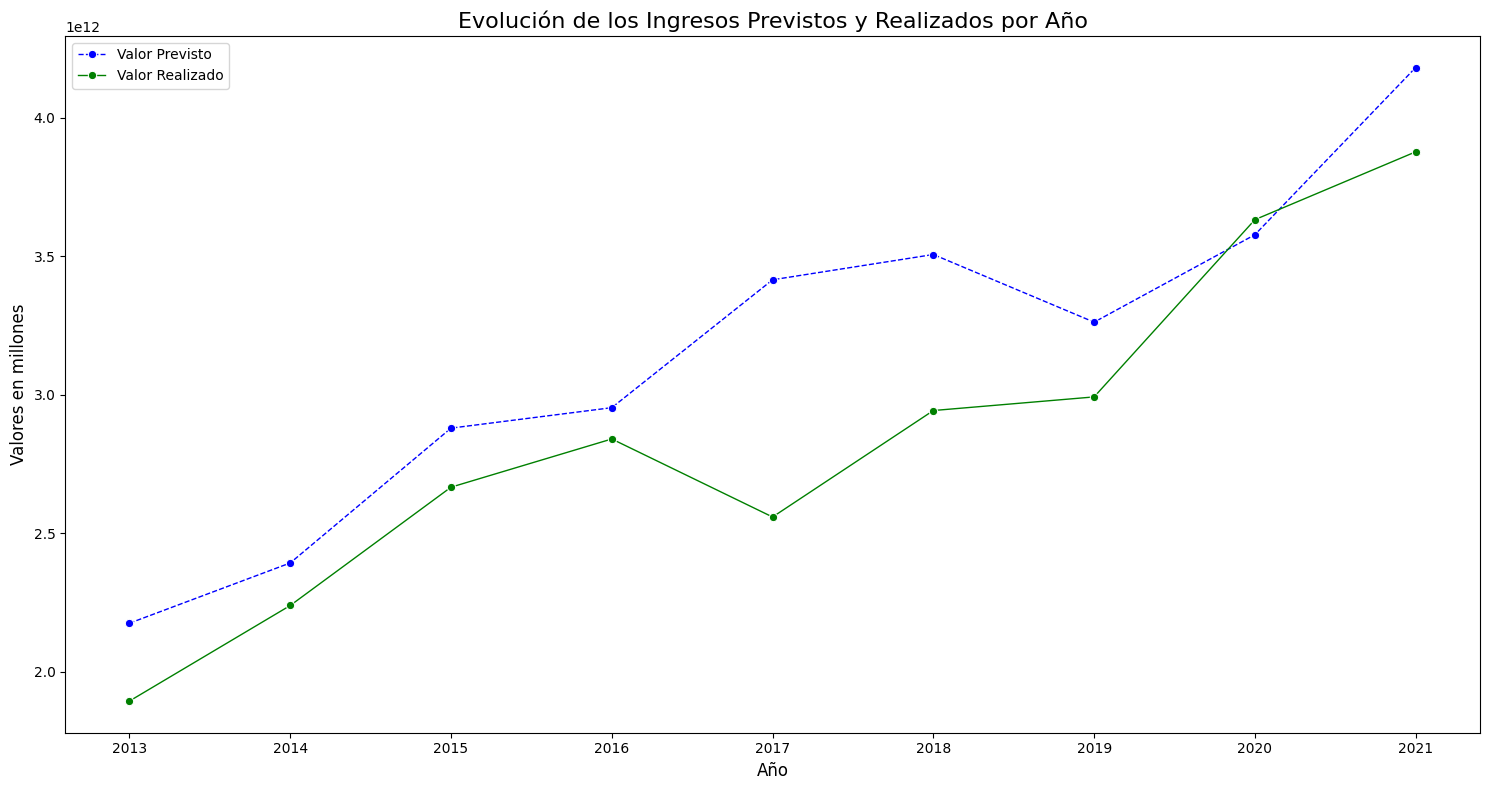

In [58]:
# Establecer el tamaño de la figura
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

# Crear gráfico de línea para el Valor Previsto
sns.lineplot(
    x=tendencias_año["AÑO EJERCICIO"], 
    y=tendencias_año["VALOR PREVISTO ACTUALIZADO"], 
    label="Valor Previsto", 
    marker="o", 
    linewidth=1, 
    color="blue", 
    linestyle="dashed", 
    ax=axes
)

# Crear gráfico de línea para el Valor Realizado
sns.lineplot(
    x=tendencias_año["AÑO EJERCICIO"], 
    y=tendencias_año["VALOR REALIZADO"], 
    label="Valor Realizado", 
    marker="o", 
    linewidth=1, 
    color="green", 
    linestyle="solid", 
    ax=axes
)

# Añadir título y etiquetas
axes.set_title("Evolución de los Ingresos Previstos y Realizados por Año", fontsize=16)
axes.set_xlabel("Año", fontsize=12)
axes.set_ylabel("Valores en millones", fontsize=12)

# Añadir leyenda
axes.legend(loc="upper left")

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

In [51]:
tendencias_mes = df.groupby(["MES", "MES_NUMERO"])[["VALOR PREVISTO ACTUALIZADO","VALOR LANZADO","VALOR REALIZADO"]].sum()
tendencias_mes = tendencias_mes.reset_index()
tendencias_mes["DIFERENCIA"] = tendencias_año["VALOR REALIZADO"] -  tendencias_año["VALOR PREVISTO ACTUALIZADO"]
tendencias_mes.sort_values(by="MES_NUMERO", ascending=True)

,MES,MES_NUMERO,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,DIFERENCIA
4,January,1,16711007147653.00,15076064130.74,1933735689252.62,-856332201814.88
3,February,2,0.00,-23904264713.16,1195699037131.18,-112984664612.72
7,March,3,0.00,10260220118.57,1666703302836.62,54301910613.92
0,April,4,4180716471387.52,644696348.51,1591284527803.02,-281037227222.26
8,May,5,0.00,53008836626.70,1282092166671.36,-304344446514.48
6,June,6,49838878.54,2044446443449.22,1259371774462.61,-269813960689.85
5,July,7,101407416.09,411290397497.71,1683137099845.77,-563260458936.31
1,August,8,43637746.28,92572614076.49,1700053802235.86,-153578146791.35
11,September,9,0.00,59935127566.93,1890279011080.10,NaN
10,October,10,47580732.11,-55155034177.98,1734953591607.39,NaN
